<img src="../../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# _*Quantum algorithm for linear system of equations*_ 

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors 
Shan Jin, Xi He, Xiaokai Hou, Li Sun, Dingding Wen, Shaojun Wu and Xiaoting Wang$^{1}$

1. Institute of Fundamental and Frontier Sciences, University of Electronic Science and Technology of China，Chengdu, China，610051
***

## Introduction
Solving linear equations is a very common problem in the fields of numerical optimization and machine learning. With the rapid expansion of data sets, solving linear equations becomes more and more difficult for classical computer. However, quantum computers can be used for solving linear systems of algebraic equations with exponential speed up compared with classical computers. Therefore, the use of quantum computers to solve the system of linear equations can greatly reduce the computational complexity and time complexity. 

#### Experiment design
<p>We have a Hermitian $N \times N$ matrix $A$, and a unit vector $\vec b$, suppose we would like to find $x$ satisfying $A\vec x = \vec b$.[[1]](#cite_1) <br />(1)Represent $b$ as a quantum state $|b\rangle = \sum_{i=1}^{N} b_i |i\rangle$.<br />(2) Apply the conditional Hamiltonian evolution $e^{iAt}$ to $|b\rangle$ for a superposition of different times $t$. With the phase estimation algorithm, we can decompose $|b\rangle$ in the eigenbasis of $A$ and to find the corresponding eigenvalues $\lambda_j$. After this stage, the state of the system is close to $\sum_{j=1}^{N} \beta_j |u_j\rangle |\lambda_j\rangle$, where $u_j$ is the eigenvector basis of $A$, and $|b\rangle = \sum_{j=1}^{N}\beta_j |u_j\rangle$. <br />(3)Uncompute the $|\lambda_j\rangle$ register and we get a state which is propotional to $\sum_{j=1}^{N} \beta_j \lambda_{j}^{-1}|u_j\rangle = A^{-1}|b\rangle = |x\rangle$.</p>
The schematic diagram of quantum K-Means is the following picture.[[2]](#cite_2) And to make our algorithm can be run using qiskit, we design a more detailed circuit to achieve our algorithm in the next section. 
<img src="../images/hhl_1.jpg" width="400 px">
#### Quantum K-Means circuit
<img src="../images/hhl_2.png">
#### Parameter declaration
Here we set the parameters as follwing, the aim is to ensure the precision.[[3]](#cite_3) <br />
$r = 4$, $t_0=2\pi$, $S = \begin{pmatrix}1 & 0 \\ 0 & i\end{pmatrix}$, $H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}$, 
$R_y(\theta) = \begin{pmatrix}cos(\theta/2) & -sin(\theta/2) \\ sin(\theta/2) & cos(\theta/2)\end{pmatrix}$


## Data declaration
The aim of this algorithm is to solve the linear system of equations. As a demo, we take a linear equation as $A \vec x = \vec b$. In this equition, for example, we define the matrix $A$ as $A = \begin{pmatrix}2 & -1 \\ -1 & 2\end{pmatrix}$ and $\vec b$ as $\vec b=\begin{pmatrix}0 \\ 1\end{pmatrix}$. After making the $A$ and $\vec b$ as input, we implement the algorithm to obtain the result vector $\vec x$.

## Quantum algorithm for linear system of equations program

In [1]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In this section, we first judge the version of Python and import the packages of qiskit, math to implement the following code. We show our algorithm on the ibm_qasm_simulator, if you need to run it on the real quantum conputer, please remove the "#" in frint of "import Qconfig" and the set_api() function.

COMPLETED


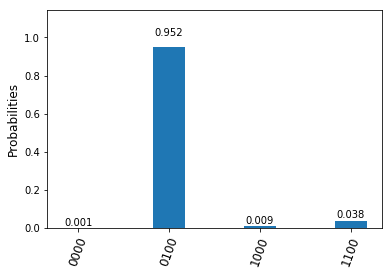

77
315
0.24444444444444444
COMPLETED


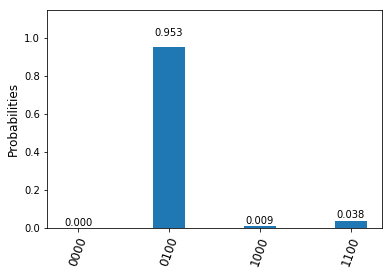

148
629
0.23529411764705882
COMPLETED


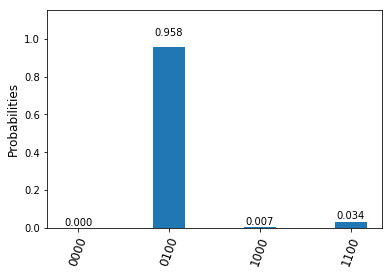

208
907
0.22932745314222713
COMPLETED


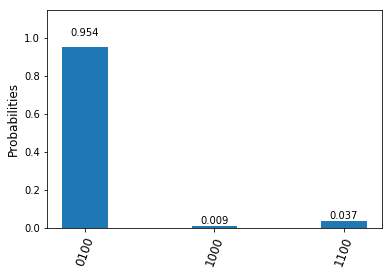

279
1210
0.23057851239669422
COMPLETED


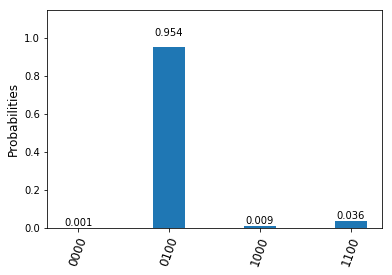

354
1509
0.2345924453280318
COMPLETED


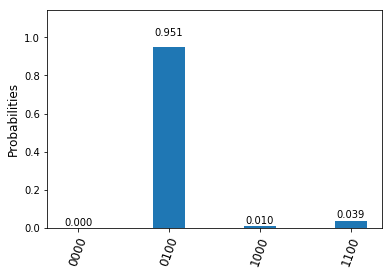

438
1826
0.23986856516976998
COMPLETED


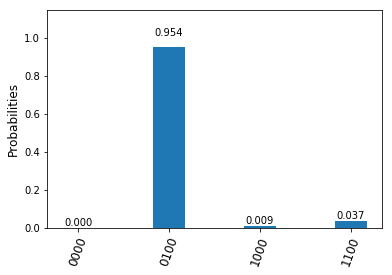

509
2129
0.2390793799906059
COMPLETED


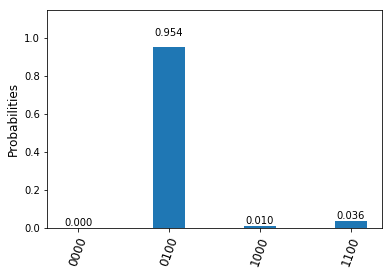

594
2420
0.24545454545454545
COMPLETED


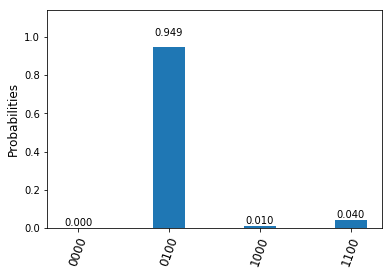

678
2748
0.24672489082969432
COMPLETED


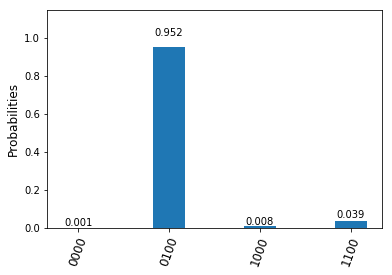

745
3067
0.2429083795239648


In [3]:
# create Quantum Register called "qr" with 4 qubits
qr = QuantumRegister(4, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(4, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="solve_linear_sys")        
    
# Initialize times that we get the result vector 
n0 = 0
n1 = 0
    
for i in range(10):
    #Set the input|b> state"
    qc.x(qr[2])
        
    #Set the phase estimation circuit
    qc.h(qr[0])
    qc.h(qr[1]) 
    qc.u1(pi, qr[0])
    qc.u1(pi/2, qr[1])
    qc.cx(qr[1], qr[2])
    
    #The quantum inverse  Fourier transform 
    qc.h(qr[0])
    qc.cu1(-pi/2, qr[0], qr[1])
    qc.h(qr[1])
    
    #R（lamda^-1） Rotation
    qc.x(qr[1])
    qc.cu3(pi/16, 0, 0, qr[0], qr[3])
    qc.cu3(pi/8, 0, 0, qr[1], qr[3])   
    
    #Uncomputation
    qc.x(qr[1])
    qc.h(qr[1])
    qc.cu1(pi/2, qr[0], qr[1])
    qc.h(qr[0])
    
    qc.cx(qr[1], qr[2])
    qc.u1(-pi/2, qr[1])
    qc.u1(-pi, qr[0])
    
    qc.h(qr[1]) 
    qc.h(qr[0])
         
    # To measure the whole quantum register
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    qc.measure(qr[3], cr[3])

    job = execute(qc, backend=backend, shots=8192,)
    result = job.result()
        
    # Get the sum og all results
    n0 = n0 + result.get_data("solve_linear_sys")['counts']['1000']
    n1 = n1 + result.get_data("solve_linear_sys")['counts']['1100']
    
    # print the result
    print(result)
#     print(result.get_data(qc))
    plot_histogram(result.get_counts())
        
                
#     Reset the circuit
    qc.reset(qr)
    
    # calculate the scale of the elements in result vectot and print it.
    p = n0/n1
    print(n0)
    print(n1)
    print(p)

## Result analysis
According to the result, we can obtain the scale of two elements in $\vec x$. Via features of linear system, we can get
$A\vec x=A\begin{pmatrix}a_1 \\ ka_2\end{pmatrix}=\vec b=\begin{pmatrix}0 \\ 1\end{pmatrix}$. So we can get the answer, $\vec x=\begin{pmatrix}0.32665 \\0.67335\end{pmatrix} $.<br \> For more examples, we test different value of $\vec b$ and get the answer about $\vec x $ as following table: <br \>
<img src="../images/hhl_3.png" width="500 px">
And the statistic result is showed as following:
<img src="../images/hhl_4.png" width="500 px">

## Reference
<cite>[1]Quantum Algorithm for Linear Systems of Equations(see [Aram W. Harrow, Avinatan Hassidim, and Seth Lloyd
Phys. Rev. Lett. 103, 150502](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.103.150502))</cite><a id='cite_1'></a><br \>
<cite>[2]Quantum circuit design for solving linear systems of equations(see [Yudong Cao,Anmer Daskin,Steven Frankel & Sabre Kais](https://www.tandfonline.com/doi/abs/10.1080/00268976.2012.668289))</cite><a id='cite_2'></a><br \>
<cite>[3]Experimental realization of quantum algorithm for solving linear systems of equations(see [Jian Pan, Yudong Cao, Xiwei Yao, Zhaokai Li, Chenyong Ju, Hongwei Chen, Xinhua Peng, Sabre Kais, and Jiangfeng Du Phys. Rev. A 89, 022313](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.89.022313))</cite><a id='cite_3'></a>